In [ ]:
import numpy as np
import pandas as pd
import plotly.express as px

In [ ]:
data = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/Data%20Sets%20Time%20Series%20Analysis/Time%20Series%20-%20Day%205/NFLX_data.csv')
data['date'] = pd.to_datetime(data['date'])
data.columns = ['Date', 'Open', 'High', 'Low', 'Observed', 'Volume', 'Ticker']
data.head()

,Date,Open,High,Low,Observed,Volume,Ticker
0,2013-02-08,25.9635,26.2800,25.7157,25.8528,25649820,NFLX
1,2013-02-11,25.5685,26.0071,24.9714,25.4128,29321782,NFLX
2,2013-02-12,25.8085,26.2228,25.1014,25.4214,34388802,NFLX
3,2013-02-13,25.8428,26.6285,25.6657,26.6098,40799094,NFLX
4,2013-02-14,26.7557,27.1214,26.3844,26.7714,31968685,NFLX


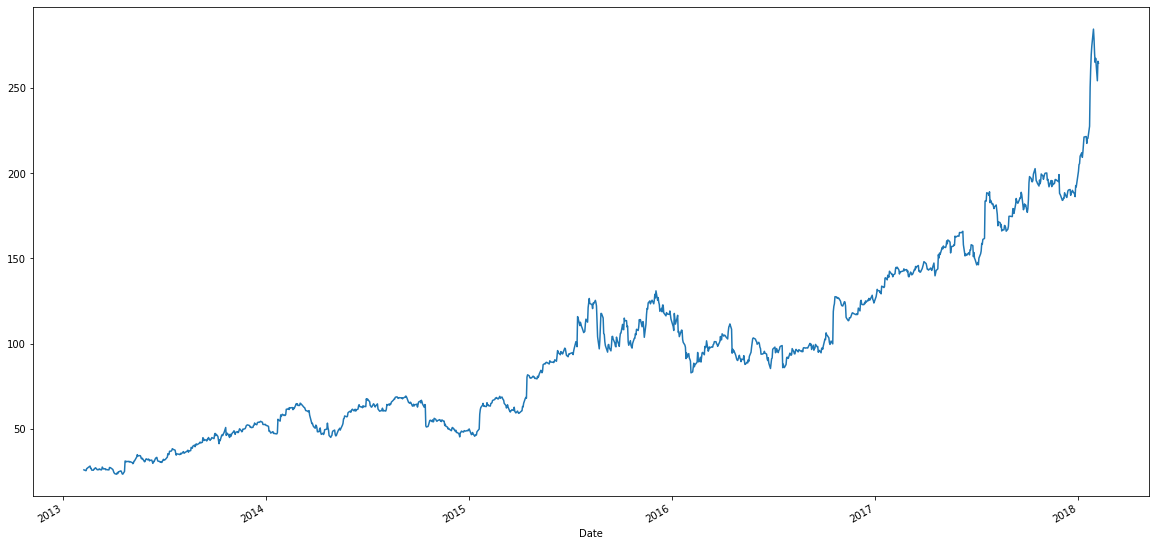

In [ ]:
data.set_index('Date')['Observed'].plot(figsize=(20,10))

In [ ]:
data['Returns'] = data['Observed'].pct_change(1)
data['MA_5'] = data['Observed'].rolling(5).mean()
data['MA_10'] = data['Observed'].rolling(10).mean()
data['Trend'] = 'None'
data.loc[(data['MA_5'] < data['MA_10']), 'Trend'] = 'Negative'
data.loc[(data['MA_5'] > data['MA_10']), 'Trend'] = 'Positive'
data['Change'] = data['Trend'].eq(data['Trend'].shift())

data['Binary'] = 0
data.loc[(data['Change']==False) & (data['Trend'] != 'None'), 'Binary'] = 1

data.dropna(inplace=True)
data.tail(100)

,Date,Open,High,Low,Observed,Volume,Ticker,Returns,MA_5,MA_10,Trend,Change,Binary
1159,2017-09-15,182.73,184.930,181.430,182.35,5591743,NFLX,-0.001533,183.102,179.944,Positive,True,0
1160,2017-09-18,183.61,185.450,182.730,184.62,5359569,NFLX,0.012449,183.678,180.932,Positive,True,0
1161,2017-09-19,184.98,186.230,184.170,185.68,4982086,NFLX,0.005742,183.784,182.048,Positive,True,0
1162,2017-09-20,186.10,186.500,183.200,185.51,4624993,NFLX,-0.000916,184.158,182.674,Positive,True,0
1163,2017-09-21,185.82,189.950,184.510,188.78,7148104,NFLX,0.017627,185.388,183.652,Positive,True,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,2018-02-01,266.41,271.950,263.380,265.07,9669011,NFLX,-0.019349,274.672,260.269,Positive,True,0
1255,2018-02-02,263.00,270.620,262.710,267.43,9123610,NFLX,0.008903,273.238,264.966,Positive,True,0
1256,2018-02-05,262.00,267.899,250.030,254.26,11896053,NFLX,-0.049247,267.172,267.634,Negative,False,1
1257,2018-02-06,247.70,266.700,245.000,265.72,12595801,NFLX,0.045072,264.556,269.177,Negative,True,0


In [ ]:
data.head(50)

,Date,Open,High,Low,Observed,Volume,Ticker,Returns,MA_5,MA_10,Trend,Change,Binary
9,2013-02-22,26.2457,26.2557,25.4900,25.6943,38841173,NFLX,-0.038952,26.85976,26.43670,Positive,False,1
10,2013-02-25,25.8557,26.7285,25.0643,25.6171,52156104,NFLX,-0.003005,26.56856,26.41313,Positive,True,0
11,2013-02-26,25.8000,26.4600,25.0857,26.2985,33878621,NFLX,0.026599,26.21540,26.50170,Negative,False,1
12,2013-02-27,26.2257,26.5714,25.7944,26.3314,22583071,NFLX,0.001251,26.13540,26.59270,Negative,True,0
13,2013-02-28,26.2585,27.4473,26.2157,26.8685,34291733,NFLX,0.020398,26.16196,26.61857,Negative,True,0
14,2013-03-01,26.7300,27.1914,26.6014,27.0528,21448756,NFLX,0.006859,26.43366,26.64671,Negative,True,0
15,2013-03-04,26.9543,27.1543,25.2371,25.8871,47820353,NFLX,-0.043090,26.48766,26.52811,Negative,True,0
16,2013-03-05,26.3814,26.4728,25.4400,25.9614,32308045,NFLX,0.002870,26.42024,26.31782,Positive,False,1
17,2013-03-06,26.0214,26.4228,25.6543,26.1343,17400376,NFLX,0.006660,26.38082,26.25811,Positive,True,0
18,2013-03-07,25.7143,26.0714,25.1657,25.9371,28692944,NFLX,-0.007546,26.19454,26.17825,Positive,True,0


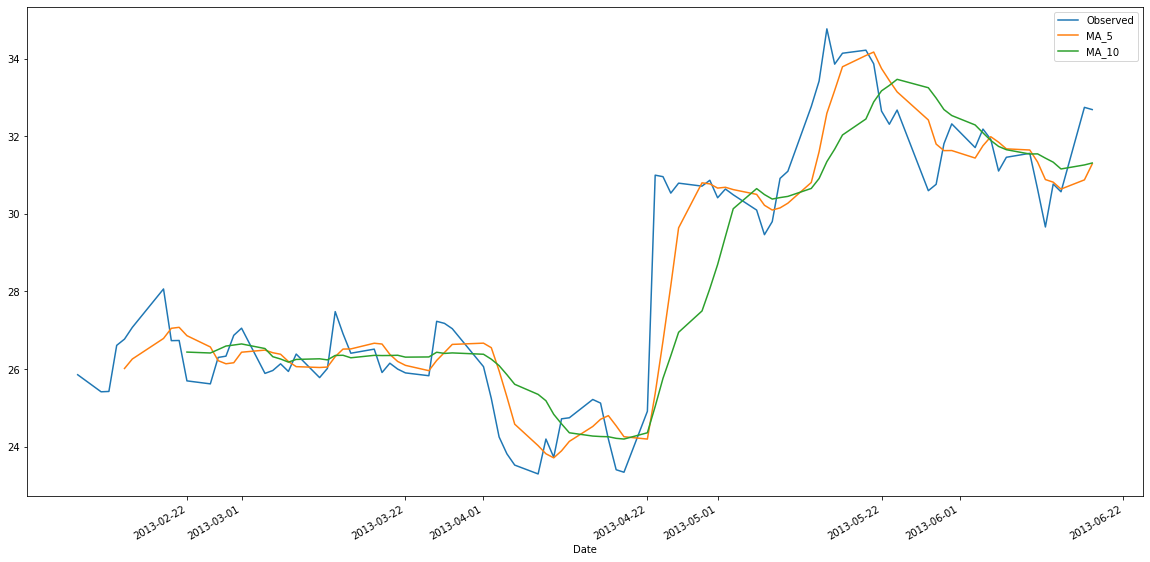

In [ ]:
data.set_index('Date').iloc[:90][['Observed', 'MA_5', 'MA_10']].plot(figsize=(20,10))

In [ ]:
transformed = data[['Date', 'Returns', 'Binary']]
transformed.head()

,Date,Returns,Binary
9,2013-02-22,-0.038952,1
10,2013-02-25,-0.003005,0
11,2013-02-26,0.026599,1
12,2013-02-27,0.001251,0
13,2013-02-28,0.020398,0


In [ ]:
history = 90
future = 0

shifts = [x + future for x in list(range(1, history + 1))]

for shift in shifts:
  transformed[f't-{shift}'] = transformed['Returns'].shift(shift)

transformed.dropna(inplace=True)

In [ ]:
transformed.head()

,Date,Returns,Binary,t-1,t-2,t-3,t-4,t-5,t-6,t-7,t-8,t-9,t-10,t-11,t-12,t-13,t-14,t-15,t-16,t-17,t-18,t-19,t-20,t-21,t-22,t-23,t-24,t-25,t-26,t-27,t-28,t-29,t-30,t-31,t-32,t-33,t-34,t-35,t-36,t-37,...,t-51,t-52,t-53,t-54,t-55,t-56,t-57,t-58,t-59,t-60,t-61,t-62,t-63,t-64,t-65,t-66,t-67,t-68,t-69,t-70,t-71,t-72,t-73,t-74,t-75,t-76,t-77,t-78,t-79,t-80,t-81,t-82,t-83,t-84,t-85,t-86,t-87,t-88,t-89,t-90
100,2013-07-03,-0.002484,1,-0.012575,0.062486,-0.018049,0.013531,-0.003758,-0.012523,-0.005993,-0.029617,-0.037837,0.015206,-0.001744,0.071217,-0.006500,0.037326,-0.031801,-0.029286,0.003223,0.011390,-0.025596,-0.008211,0.015046,-0.018916,0.016125,0.033992,0.005370,-0.063610,0.011318,-0.010413,-0.035979,-0.010268,0.002302,0.008310,-0.026171,0.040303,0.020016,0.053677,0.005932,...,0.067335,-0.002748,-0.032714,-0.036905,-0.003684,0.019056,0.001096,0.041788,-0.019426,0.038636,-0.009714,-0.012178,-0.017968,-0.039336,-0.031464,-0.036191,-0.005045,-0.001943,0.054319,-0.002815,-0.003789,-0.005793,0.009263,-0.022736,0.004003,-0.018688,-0.020742,0.056285,0.009201,-0.023012,0.017296,-0.007546,0.006660,0.002870,-0.043090,0.006859,0.020398,0.001251,0.026599,-0.003005
101,2013-07-05,0.018968,0,-0.002484,-0.012575,0.062486,-0.018049,0.013531,-0.003758,-0.012523,-0.005993,-0.029617,-0.037837,0.015206,-0.001744,0.071217,-0.006500,0.037326,-0.031801,-0.029286,0.003223,0.011390,-0.025596,-0.008211,0.015046,-0.018916,0.016125,0.033992,0.005370,-0.063610,0.011318,-0.010413,-0.035979,-0.010268,0.002302,0.008310,-0.026171,0.040303,0.020016,0.053677,...,0.244420,0.067335,-0.002748,-0.032714,-0.036905,-0.003684,0.019056,0.001096,0.041788,-0.019426,0.038636,-0.009714,-0.012178,-0.017968,-0.039336,-0.031464,-0.036191,-0.005045,-0.001943,0.054319,-0.002815,-0.003789,-0.005793,0.009263,-0.022736,0.004003,-0.018688,-0.020742,0.056285,0.009201,-0.023012,0.017296,-0.007546,0.006660,0.002870,-0.043090,0.006859,0.020398,0.001251,0.026599
102,2013-07-08,0.035541,0,0.018968,-0.002484,-0.012575,0.062486,-0.018049,0.013531,-0.003758,-0.012523,-0.005993,-0.029617,-0.037837,0.015206,-0.001744,0.071217,-0.006500,0.037326,-0.031801,-0.029286,0.003223,0.011390,-0.025596,-0.008211,0.015046,-0.018916,0.016125,0.033992,0.005370,-0.063610,0.011318,-0.010413,-0.035979,-0.010268,0.002302,0.008310,-0.026171,0.040303,0.020016,...,-0.001242,0.244420,0.067335,-0.002748,-0.032714,-0.036905,-0.003684,0.019056,0.001096,0.041788,-0.019426,0.038636,-0.009714,-0.012178,-0.017968,-0.039336,-0.031464,-0.036191,-0.005045,-0.001943,0.054319,-0.002815,-0.003789,-0.005793,0.009263,-0.022736,0.004003,-0.018688,-0.020742,0.056285,0.009201,-0.023012,0.017296,-0.007546,0.006660,0.002870,-0.043090,0.006859,0.020398,0.001251
103,2013-07-09,0.061270,0,0.035541,0.018968,-0.002484,-0.012575,0.062486,-0.018049,0.013531,-0.003758,-0.012523,-0.005993,-0.029617,-0.037837,0.015206,-0.001744,0.071217,-0.006500,0.037326,-0.031801,-0.029286,0.003223,0.011390,-0.025596,-0.008211,0.015046,-0.018916,0.016125,0.033992,0.005370,-0.063610,0.011318,-0.010413,-0.035979,-0.010268,0.002302,0.008310,-0.026171,0.040303,...,-0.013705,-0.001242,0.244420,0.067335,-0.002748,-0.032714,-0.036905,-0.003684,0.019056,0.001096,0.041788,-0.019426,0.038636,-0.009714,-0.012178,-0.017968,-0.039336,-0.031464,-0.036191,-0.005045,-0.001943,0.054319,-0.002815,-0.003789,-0.005793,0.009263,-0.022736,0.004003,-0.018688,-0.020742,0.056285,0.009201,-0.023012,0.017296,-0.007546,0.006660,0.002870,-0.043090,0.006859,0.020398
104,2013-07-10,-0.014400,0,0.061270,0.035541,0.018968,-0.002484,-0.012575,0.062486,-0.018049,0.013531,-0.003758,-0.012523,-0.005993,-0.029617,-0.037837,0.015206,-0.001744,0.071217,-0.006500,0.037326,-0.031801,-0.029286,0.003223,0.011390,-0.025596,-0.008211,0.015046,-0.018916,0.016125,0.033992,0.005370,-0.063610,0.011318,-0.010413,-0.035979,-0.010268,0.002302,0.008310,-0.026171,...,0.008420,-0.013705,-0.001242,0.244420,0.067335,-0.002748,-0.032714,-0.036905,-0.003684,0.019056,0.001096,0.041788,-0.019426,0.038636,-0.009714,-0.01217

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [ ]:
x = transformed.drop(columns=['Date', 'Returns','Binary'])
y = transformed['Binary']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=False)

In [ ]:
y.value_counts()

0    1041
1     118
Name: Binary, dtype: int64

In [ ]:
model = LogisticRegression(class_weight='balanced')
model.fit(x_train, y_train)

predictions = model.predict(x_test)

In [ ]:
model.score(x_test, y_test)

0.7155172413793104

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.89      0.77      0.83       206
           1       0.13      0.27      0.18        26

    accuracy                           0.72       232
   macro avg       0.51      0.52      0.50       232
weighted avg       0.81      0.72      0.75       232



In [ ]:
data.head()

,Date,Open,High,Low,Observed,Volume,Ticker,Returns,MA_5,MA_10,Trend,Change,Binary
9,2013-02-22,26.2457,26.2557,25.4900,25.6943,38841173,NFLX,-0.038952,26.85976,26.43670,Positive,False,1
10,2013-02-25,25.8557,26.7285,25.0643,25.6171,52156104,NFLX,-0.003005,26.56856,26.41313,Positive,True,0
11,2013-02-26,25.8000,26.4600,25.0857,26.2985,33878621,NFLX,0.026599,26.21540,26.50170,Negative,False,1
12,2013-02-27,26.2257,26.5714,25.7944,26.3314,22583071,NFLX,0.001251,26.13540,26.59270,Negative,True,0
13,2013-02-28,26.2585,27.4473,26.2157,26.8685,34291733,NFLX,0.020398,26.16196,26.61857,Negative,True,0


In [ ]:
# (data['Returns'] > 0) * 1
# (data['Returns'] > 0).astype(int)


9       0
10      0
11      1
12      1
13      1
       ..
1254    0
1255    1
1256    0
1257    1
1258    0
Name: Returns, Length: 1250, dtype: int64

In [ ]:
# clustering

transformed = data[['Date', 'Returns', 'Binary']]

history = 30
future = 0

shifts = [x + future for x in list(range(1, history + 1))]

for shift in shifts:
    transformed['t-' + str(shift)] = transformed['Returns'].shift(shift)

transformed.dropna(inplace=True)

x = transformed.set_index('Date').drop(['Returns', 'Binary'], axis=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
x

,t-1,t-2,t-3,t-4,t-5,t-6,t-7,t-8,t-9,t-10,t-11,t-12,t-13,t-14,t-15,t-16,t-17,t-18,t-19,t-20,t-21,t-22,t-23,t-24,t-25,t-26,t-27,t-28,t-29,t-30
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2013-04-08,-0.012178,-0.017968,-0.039336,-0.031464,-0.036191,-0.005045,-0.001943,0.054319,-0.002815,-0.003789,-0.005793,0.009263,-0.022736,0.004003,-0.018688,-0.020742,0.056285,0.009201,-0.023012,0.017296,-0.007546,0.006660,0.002870,-0.043090,0.006859,0.020398,0.001251,0.026599,-0.003005,-0.038952
2013-04-09,-0.009714,-0.012178,-0.017968,-0.039336,-0.031464,-0.036191,-0.005045,-0.001943,0.054319,-0.002815,-0.003789,-0.005793,0.009263,-0.022736,0.004003,-0.018688,-0.020742,0.056285,0.009201,-0.023012,0.017296,-0.007546,0.006660,0.002870,-0.043090,0.006859,0.020398,0.001251,0.026599,-0.003005
2013-04-10,0.038636,-0.009714,-0.012178,-0.017968,-0.039336,-0.031464,-0.036191,-0.005045,-0.001943,0.054319,-0.002815,-0.003789,-0.005793,0.009263,-0.022736,0.004003,-0.018688,-0.020742,0.056285,0.009201,-0.023012,0.017296,-0.007546,0.006660,0.002870,-0.043090,0.006859,0.020398,0.001251,0.026599
2013-04-11,-0.019426,0.038636,-0.009714,-0.012178,-0.017968,-0.039336,-0.031464,-0.036191,-0.005045,-0.001943,0.054319,-0.002815,-0.003789,-0.005793,0.009263,-0.022736,0.004003,-0.018688,-0.020742,0.056285,0.009201,-0.023012,0.017296,-0.007546,0.006660,0.002870,-0.043090,0.006859,0.020398,0.001251
2013-04-12,0.041788,-0.019426,0.038636,-0.009714,-0.012178,-0.017968,-0.039336,-0.031464,-0.036191,-0.005045,-0.001943,0.054319,-0.002815,-0.003789,-0.005793,0.009263,-0.022736,0.004003,-0.018688,-0.020742,0.056285,0.009201,-0.023012,0.017296,-0.007546,0.006660,0.002870,-0.043090,0.006859,0.020398
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-02-01,-0.030488,-0.020345,0.036380,0.018168,0.032147,0.043989,0.099789,0.032296,0.000590,0.013011,-0.018192,0.001356,0.018367,0.022210,0.015336,-0.012921,0.009810,0.021203,0.002829,0.019794,0.047458,-0.003892,0.034740,-0.008095,-0.011477,0.006998,-0.001059,0.009625,-0.017855,0.001578
2018-02-02,-0.019349,-0.030488,-0.020345,0.036380,0.018168,0.032147,0.043989,0.099789,0.032296,0.000590,0.013011,-0.018192,0.001356,0.018367,0.022210,0.015336,-0.012921,0.009810,0.021203,0.002829,0.019794,0.047458,-0.003892,0.034740,-0.008095,-0.011477,0.006998,-0.001059,0.009625,-0.017855
2018-02-05,0.008903,-0.019349,-0.030488,-0.020345,0.036380,0.018168,0.032147,0.043989,0.099789,0.032296,0.000590,0.013011,-0.018192,0.001356,0.018367,0.022210,0.015336,-0.012921,0.009810,0.021203,0.002829,0.019794,0.047458,-0.003892,0.034740,-0.008095,-0.011477,0.006998,-0.001059,0.009625


In [ ]:
from sklearn.cluster import KMeans

def kmeans(df, clusters=2):
    model = KMeans(n_clusters=clusters, random_state=42)
    clusters = model.fit_predict(df)
    results = df.copy()
    results['Cluster'] = clusters
    
    cluster_size = results.groupby(['Cluster']).size().reset_index()
    cluster_size.columns = ['Cluster', 'Count']
    cluster_means = results.groupby(['Cluster'], as_index=False).mean()
    summary = pd.merge(cluster_size, cluster_means, on='Cluster')
    
    return results, summary

In [ ]:
results, summary = kmeans(x, 8)

In [ ]:
results.head()

,t-1,t-2,t-3,t-4,t-5,t-6,t-7,t-8,t-9,t-10,t-11,t-12,t-13,t-14,t-15,t-16,t-17,t-18,t-19,t-20,t-21,t-22,t-23,t-24,t-25,t-26,t-27,t-28,t-29,t-30,Cluster
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2013-04-08,-0.012178,-0.017968,-0.039336,-0.031464,-0.036191,-0.005045,-0.001943,0.054319,-0.002815,-0.003789,-0.005793,0.009263,-0.022736,0.004003,-0.018688,-0.020742,0.056285,0.009201,-0.023012,0.017296,-0.007546,0.006660,0.002870,-0.043090,0.006859,0.020398,0.001251,0.026599,-0.003005,-0.038952,4
2013-04-09,-0.009714,-0.012178,-0.017968,-0.039336,-0.031464,-0.036191,-0.005045,-0.001943,0.054319,-0.002815,-0.003789,-0.005793,0.009263,-0.022736,0.004003,-0.018688,-0.020742,0.056285,0.009201,-0.023012,0.017296,-0.007546,0.006660,0.002870,-0.043090,0.006859,0.020398,0.001251,0.026599,-0.003005,4
2013-04-10,0.038636,-0.009714,-0.012178,-0.017968,-0.039336,-0.031464,-0.036191,-0.005045,-0.001943,0.054319,-0.002815,-0.003789,-0.005793,0.009263,-0.022736,0.004003,-0.018688,-0.020742,0.056285,0.009201,-0.023012,0.017296,-0.007546,0.006660,0.002870,-0.043090,0.006859,0.020398,0.001251,0.026599,6
2013-04-11,-0.019426,0.038636,-0.009714,-0.012178,-0.017968,-0.039336,-0.031464,-0.036191,-0.005045,-0.001943,0.054319,-0.002815,-0.003789,-0.005793,0.009263,-0.022736,0.004003,-0.018688,-0.020742,0.056285,0.009201,-0.023012,0.017296,-0.007546,0.006660,0.002870,-0.043090,0.006859,0.020398,0.001251,1
2013-04-12,0.041788,-0.019426,0.038636,-0.009714,-0.012178,-0.017968,-0.039336,-0.031464,-0.036191,-0.005045,-0.001943,0.054319,-0.002815,-0.003789,-0.005793,0.009263,-0.022736,0.004003,-0.018688,-0.020742,0.056285,0.009201,-0.023012,0.017296,-0.007546,0.006660,0.002870,-0.043090,0.006859,0.020398,0


In [ ]:
summary

,Cluster,Count,t-1,t-2,t-3,t-4,t-5,t-6,t-7,t-8,t-9,t-10,t-11,t-12,t-13,t-14,t-15,t-16,t-17,t-18,t-19,t-20,t-21,t-22,t-23,t-24,t-25,t-26,t-27,t-28,t-29,t-30
0,0,110,0.040981,-0.003979,0.010162,0.009647,0.003740,-0.014940,0.000786,-0.008529,0.005474,-0.008069,-0.000268,0.002180,-0.000174,0.004050,-0.000252,-0.003015,-0.011002,-0.004269,0.001492,-0.007881,0.000082,-0.009322,0.000827,-0.007685,0.002425,-0.000917,0.002428,-0.006375,0.001339,0.000386
1,1,420,-0.006629,0.001040,0.003411,0.001721,-0.005727,-0.000171,-0.002714,-0.001568,-0.000231,0.003218,0.000883,0.000882,0.007357,-0.003635,0.004868,0.001151,0.003204,-0.002108,0.004342,0.003923,0.000118,0.000002,0.009850,0.009478,-0.000429,0.002382,-0.000929,0.006686,0.001883,0.001684
2,2,153,-0.000428,-0.005159,0.003805,0.006808,-0.000260,0.006995,0.013777,0.007987,-0.000033,0.014058,0.023070,0.006738,0.003363,0.027577,0.000985,0.004936,-0.003493,0.002709,0.003255,0.002835,-0.003094,0.001389,-0.002783,0.000282,0.012355,0.001734,0.021308,0.007746,-0.000471,-0.006051
3,3,48,0.009750,0.057358,0.007400,0.000530,0.003863,-0.003064,0.001960,-0.000081,0.002671,-0.001420,-0.005442,-0.006963,-0.005682,-0.000087,0.038813,0.044525,0.003315,0.001659,-0.006064,-0.004009,-0.004103,-0.001206,0.001043,0.002123,-0.002648,-0.002923,-0.002329,-0.000247,-0.006883,-0.003026
4,4,139,0.000038,0.001193,-0.008604,-0.012446,0.005431,0.004656,0.006087,0.029040,0.025726,0.005554,-0.000352,-0.002387,-0.004722,-0.004477,0.002387,-0.003403,-0.000937,-0.000015,0.006036,-0.000858,0.019078,-0.002453,-0.000787,-0.001187,0.000989,-0.000258,-0.000333,-0.007432,0.018054,-0.002853
5,5,68,-0.000170,0.005346,0.040710,0.017527,0.007406,0.007662,0.003534,0.004117,-0.002723,0.000266,-0.002561,0.001673,0.001820,-0.002759,0.003748,-0.001542,0.033330,0.028435,0.004155,-0.004824,-0.002799,-0.004276,-0.004518,0.000705,-0.002527,0.040202,-0.000739,-0.004292,-0.001605,-0.007782
6,6,101,0.008236,-0.003069,0.000236,-0.002552,-0.003326,0.011776,0.000132,0.004631,0.003278,0.004459,0.005468,0.022193,-0.006886,0.001199,-0.002884,0.003764,0.004483,0.004049,0.014740,-0.009139,-0.000536,0.030199,-0.003953,-0.006777,-0.006903,-0.002896,-0.006701,0.004371,-0.003092,0.038627
7,7,181,-0.000485,0.003417,-0.012559,0.003951,0.020327,0.006704,0.003034,-0.008786,-0.008596,-0.005683,-0.006799,-0.003935,0.002642,0.000670,-0.009895,-0.001737,0.001314,0.006069,-0.012554,0.015928,0.004113,0.005461,-0.002859,-0.000036,0.007411,-0.005510,0.001028,0.000182,-0.001044,-0.001366


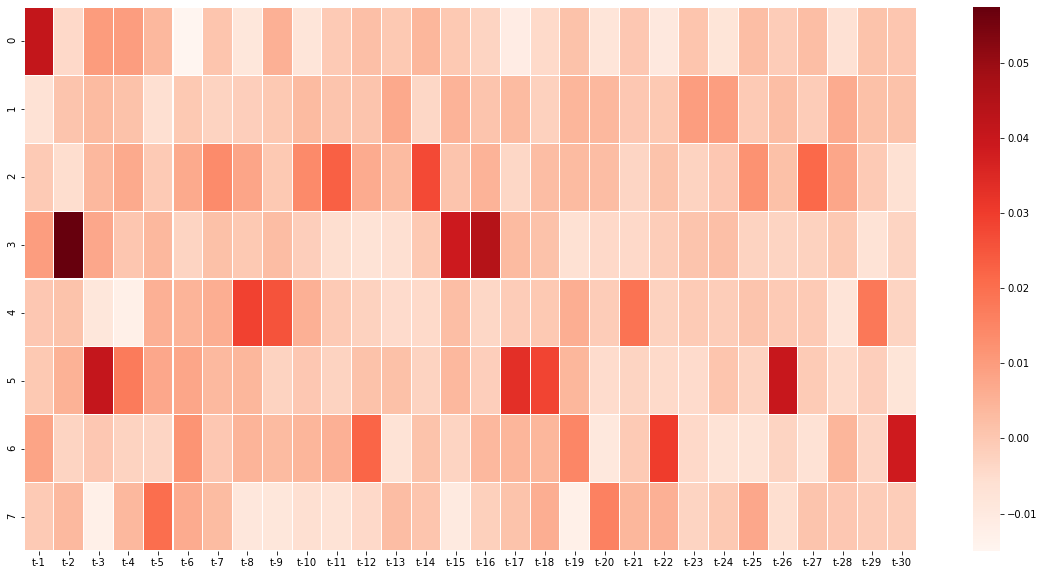

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
sns.heatmap(summary.drop(columns=['Cluster', 'Count']), cmap='Reds', linewidths=0.01)